               ProductName  Reveneau
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00


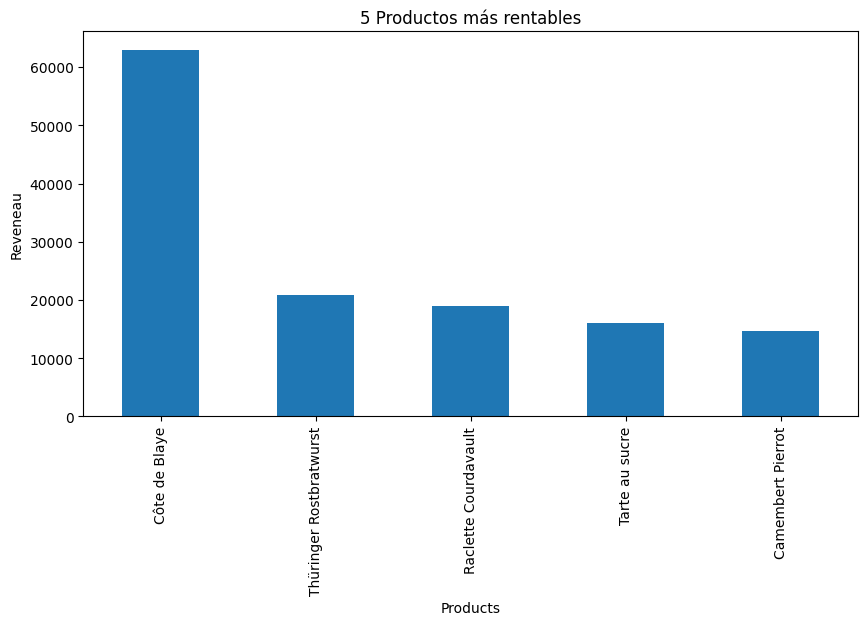

                 ProductName  Reveneau
0  Laughing Lumberjack Lager      70.0
1                Røgede sild     142.5
2                   Filo Mix     336.0


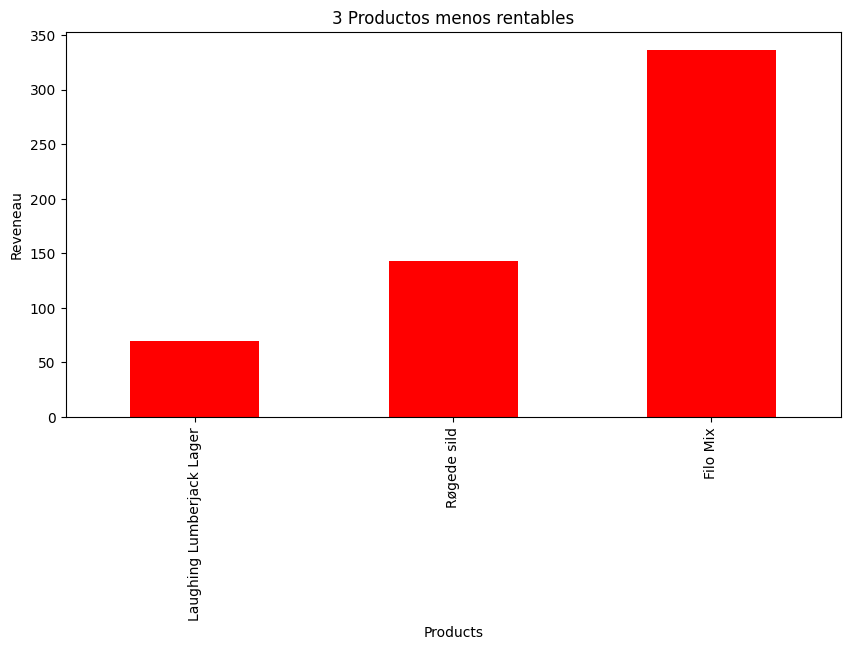

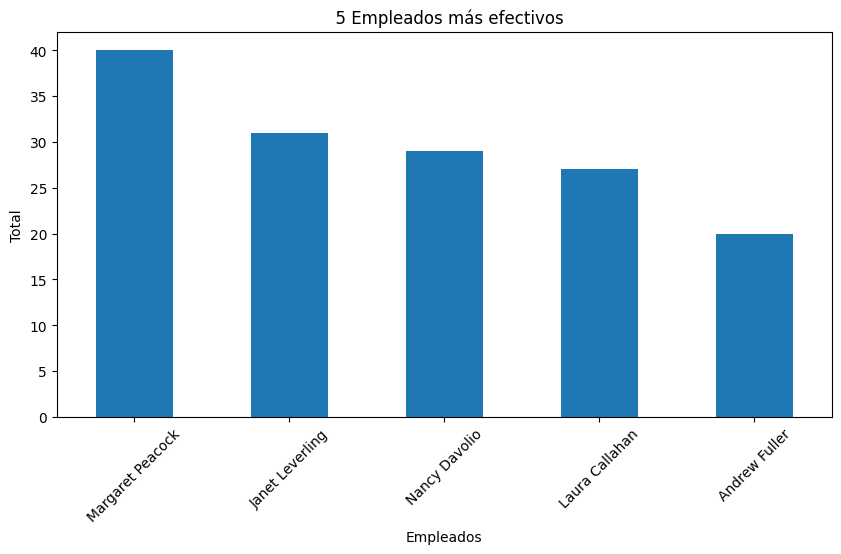

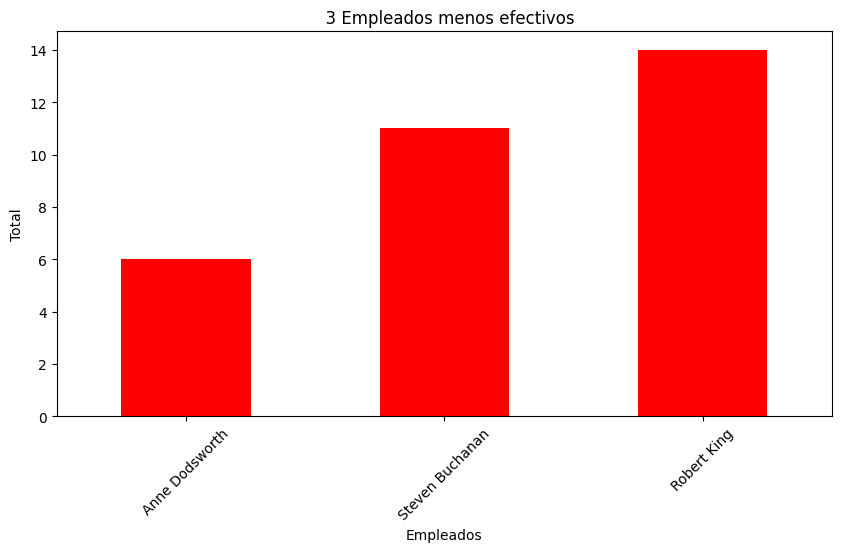

In [1]:
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns

with sq.connect("Northwind.db") as conn :
    
    query1 = ('''
       SELECT ProductName,SUM(Price * Quantity) as Reveneau
       From OrderDetails OD
       JOIN Products p ON p.ProductID = OD.ProductID
       GROUP BY OD.ProductID
       ORDER BY Reveneau DESC
       LIMIT 5
 ''')
    
    top_products_df = pd.read_sql_query(query1,conn)
    
    print(top_products_df)

    top_products_df.plot(x = "ProductName", y = "Reveneau" ,kind = "bar",figsize = (10,5),legend = False)

    plt.title("5 Productos más rentables")
    plt.xlabel("Products")
    plt.ylabel("Reveneau")
    plt.xticks(rotation = 90)
    plt.show()

    
    query1_1 = ('''
      SELECT ProductName,SUM(Price * Quantity) as Reveneau
      From OrderDetails OD
      JOIN Products p ON p.ProductID = OD.ProductID
      GROUP BY OD.ProductID
      ORDER BY Reveneau ASC
      LIMIT 3
''')
    
    cursor = conn.cursor()
    top_products_df = pd.read_sql_query(query1_1,conn)
    
    print(top_products_df)
   
    top_products_df.plot(x = "ProductName", y = "Reveneau" ,kind = "bar",figsize = (10,5),legend = False, color = "red")   

    plt.title("3 Productos menos rentables")
    plt.xlabel("Products")
    plt.ylabel("Reveneau")
    plt.xticks(rotation = 90)
    plt.show()

    query2 = '''
    SELECT FirstName || " " || LastName as Employee, COUNT(*) as Total
     From Orders O
     JOIN Employees E
     ON E.EmployeeID = O.EmployeeID
     GROUP BY O.EmployeeID
     ORDER BY Total DESC
     LIMIT 5
'''

    top_employees = pd.read_sql_query(query2,conn)
    top_employees.plot(x = "Employee" , y= "Total" , kind = "bar" ,figsize = (10,5),legend = False)

    plt.title("  5 Empleados más efectivos")
    plt.xlabel("Empleados")
    plt.ylabel("Total")
    plt.xticks(rotation = 45)
    plt.show()
    
    query2_2 = '''
    SELECT FirstName || " " || LastName as Employee, COUNT(*) as Total
     From Orders O
     JOIN Employees E
     ON E.EmployeeID = O.EmployeeID
     GROUP BY O.EmployeeID
     ORDER BY Total ASC
     LIMIT 3
'''

    top_employees = pd.read_sql_query(query2_2,conn)
    top_employees.plot(x = "Employee" , y= "Total" , kind = "bar" ,figsize = (10,5),legend = False, color = "red")

    plt.title("  3 Empleados menos efectivos")
    plt.xlabel("Empleados")
    plt.ylabel("Total")
    plt.xticks(rotation = 45)
    plt.show()